link : https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_ultralytics.ipynb

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.2 MB/s eta 0:00:0

In [ ]:
#import os
#os.getcwd()

- Import required modules:

In [ ]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download two test images:

In [ ]:
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')
download_from_url('https://ultralytics.com/images/boats.jpg', 'demo_data/obb_test_image.png')

## 1. Standard Inference with an Ultralytics Model

- Instantiate a detection model by defining model weight path and other parameters:

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path="yolo11n.pt", # any yolov8/yolov9/yolo11/yolo12/rt-detr det model is supported
    confidence_threshold=0.35,
    device="cpu", # or 'cuda:0' if GPU is available
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 328MB/s]


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

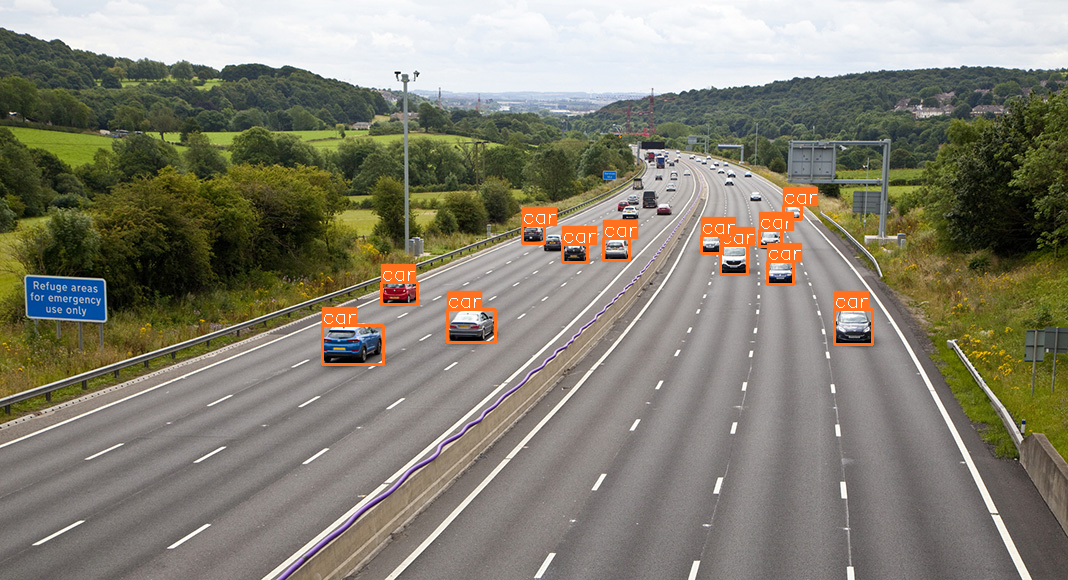

In [ ]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8/YOLO11 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

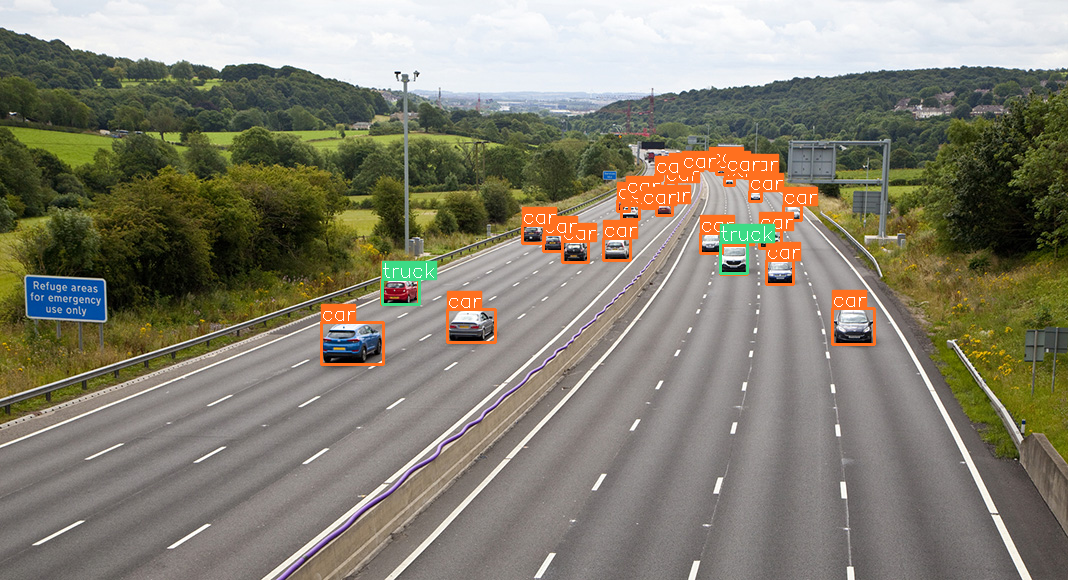

In [ ]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(np.float64(447.78826904296875), np.float64(309.0735778808594), np.float64(495.37837982177734), np.float64(342.2121276855469)), w: 47.590110778808594, h: 33.1385498046875>,
    mask: None,
    score: PredictionScore: <value: 0.9221547842025757>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.78826904296875,
   309.0735778808594,
   47.590110778808594,
   33.1385498046875],
  'score': 0.9221547842025757,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': None,
  'bbox': [832.6663818359375,
   308.7016830444336,
   41.41762161254883,
   36.01789093017578],
  'score': 0.8925219178199768,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': None,
  'bbox': [766.1802215576172,
   260.65986251831055,
   27.707046508789062,
   23.559619903564453],
  'score': 0.8334342241287231,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.78826904296875,
   309.0735778808594,
   47.590110778808594,
   33.1385498046875],
  'score': 0.9221547842025757,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': 1,
  'bbox': [832.6663818359375,
   308.7016830444336,
   41.41762161254883,
   36.01789093017578],
  'score': 0.8925219178199768,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': 1,
  'bbox': [766.1802215576172,
   260.65986251831055,
   27.707046508789062,
   23.559619903564453],
  'score': 0.8334342241287231,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

# 5 Sliced Segmentation

Run the same steps for YOLO11 segmentation model:

In [ ]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")

100%|██████████| 5.90M/5.90M [00:00<00:00, 287MB/s]


- Perform standard segmentation:

In [ ]:
result = get_prediction(im, detection_model_seg)

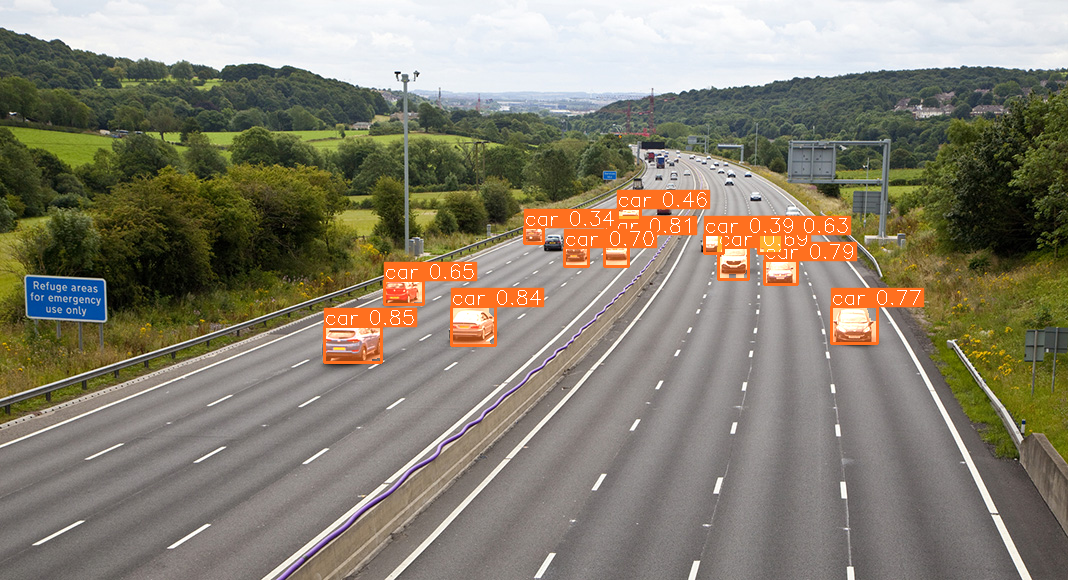

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

- Repeat for sliced segmentation:

In [ ]:
result = get_sliced_prediction(
    im,
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


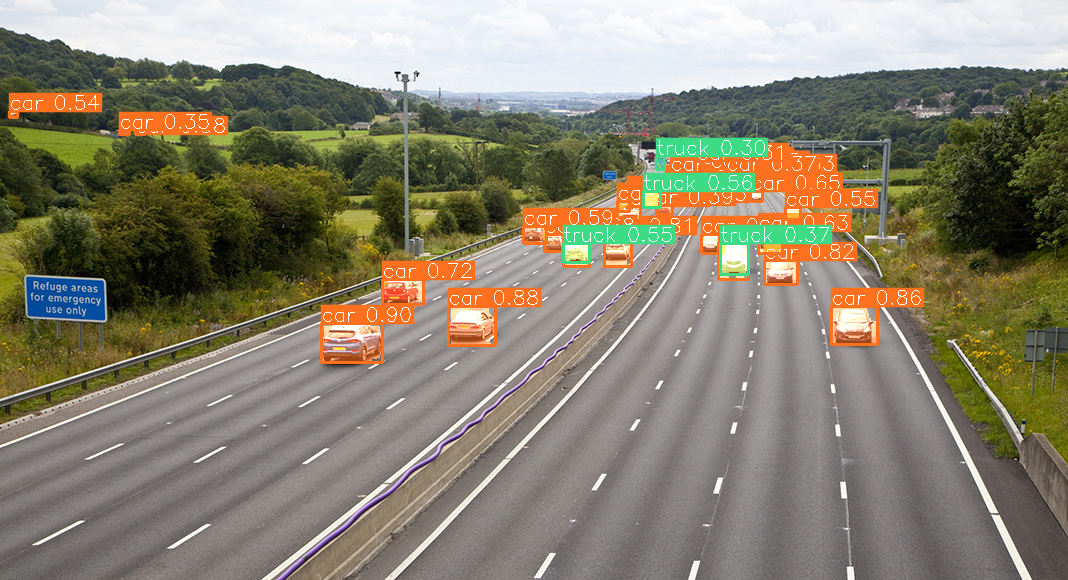

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

Sliced predictions are much better!

# 7 Sliced OBB Prediction


In [ ]:
detection_model_obb = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-obb.pt', # any yolov8/yolov9/yolo11/yolo12 obb model is supported
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/obb_test_image.png")


100%|██████████| 5.53M/5.53M [00:00<00:00, 101MB/s]


In [ ]:
result = get_sliced_prediction(
    im,
    detection_model_obb,
    slice_height = 512,
    slice_width = 512,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


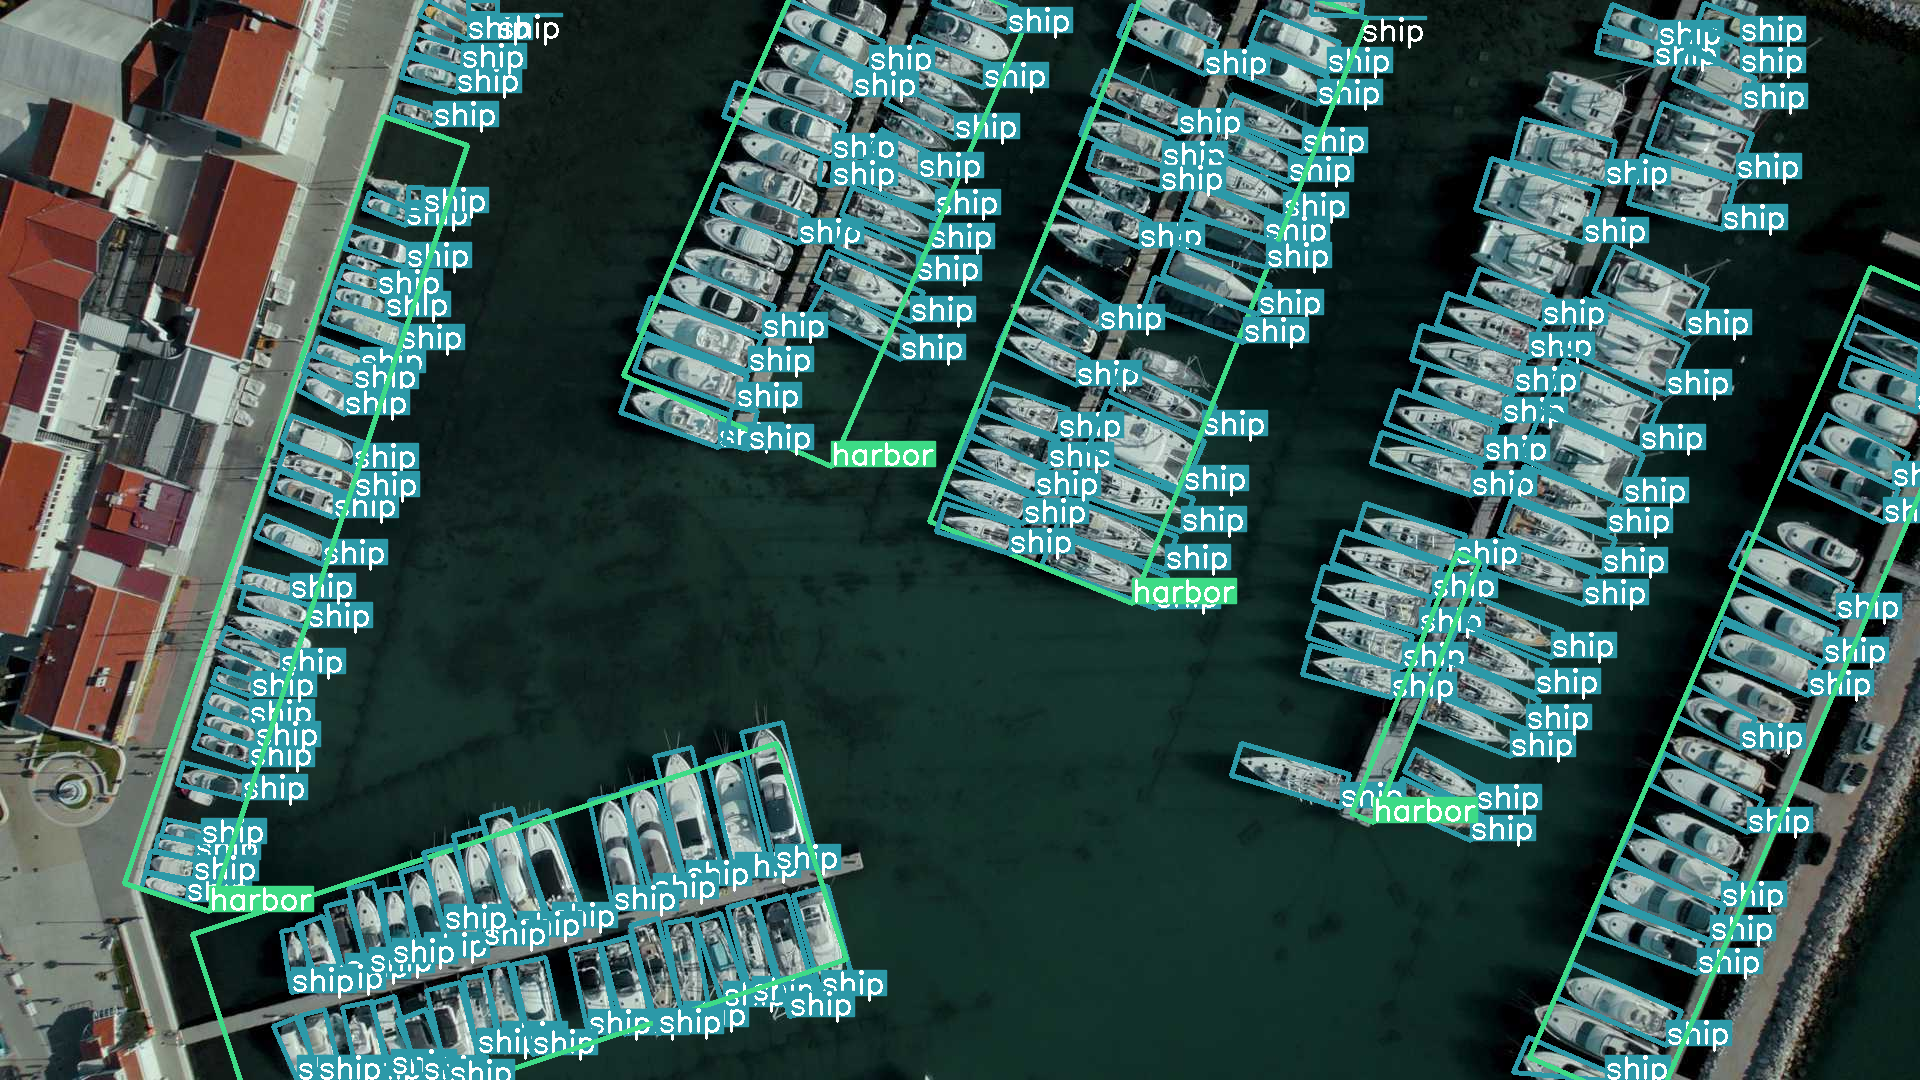

In [ ]:
result.export_visuals(export_dir="demo_data/", text_size=1, rect_th=3, hide_conf=True)

Image("demo_data/prediction_visual.png", width=800)